# The Real Problem
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

# Project Description
In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

# The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

# Overview
The images come in two formats as shown below.
- Format 1 : Original images with character level bounding boxes.
- Format 2 : MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.

Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).
Reference

# .h5 file
An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data. H5 files are commonly used in aerospace, physics, engineering, finance, academic research, genomics, astronomy, electronics instruments, and medical fields.

# Reference
Acknowledgement for the datasets.

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

# Project Objectives
The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2. Data fetching and understand the train/val/test splits.
3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)
4. Print the classification metric report (2.5 points)
5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)
6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
7. Implement batch normalization for training the neural network (2.5 points)
8. Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

# SOLUTIONING

# STEP 1 AND 2
- Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
- Data fetching and understand the train/val/test splits.

In [1]:
import h5py as h5
import pandas as pd
import numpy as np

In [2]:
with h5.File('SVHN_single_grey1.h5', 'r') as f:
    print("keys: %s" %f.keys())
    X_test = list(f[list(f.keys())[0]])
    X_train = list(f[list(f.keys())[1]])
    X_val = list(f[list(f.keys())[2]])
    y_test = list(f[list(f.keys())[3]])
    y_train = list(f[list(f.keys())[4]])
    y_val = list(f[list(f.keys())[5]])

keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [3]:
"""Check the X"""
print(type(X_test))
print(type(X_test[0]))
print(type(X_test[0][0]))
print(type(X_test[0][0][0]))

print(len(X_test))
print(len(X_test[0]))
print(len(X_test[0][0]))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>
18000
32
32


In [4]:
print(type(y_test))
print(type(y_test[0]))

print(len(y_test))

<class 'list'>
<class 'numpy.uint8'>
18000


In [5]:
print(len(X_train))
print(len(X_val))

42000
60000


- There are 6 data sets in the HDF(.h5) file.
    - First 3 data sets are the pixels values of 32 by 32 pixel sized images
        - Each row in the data is an array-of-array-of-floats.
        - The row is of type 32 by 32 float values
    - Last 3 data sets are the labels for the classes to which the corresponding images (to which the pixels belong) belong
        - The type of value is uint8 (Unsigned integer (0 to 255))
    - There are 3 pairs of feature set (X) and target set (y)
        - First pair is for training the model
        - Second pair is for testing the model while training it
        - Third pair is for validating the final model. This pair will act like prod data.

# STEP 3
Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [6]:
"""CHANGE TO ARRAY"""
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

"""STANDARDISE ALL X"""
X_test = X_test/255
X_train = X_train/255
X_val = X_val/255

In [7]:
"""RESHAPE"""
X_test = X_test.reshape(X_test.shape[0], (32*32))
X_train = X_train.reshape(X_train.shape[0], (32*32))
X_val = X_val.reshape(X_val.shape[0], (32*32))

X_test.shape

(18000, 1024)

In [10]:
""" KNN """
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_knn = []
# Calculating error for K values of 1,3,5...19
for i in range(2, 20, 2):  
    print("In for K: ", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Done with fit")
    
    # Find random 100 indexes to predict
    testInd = np.random.randint(0, X_test.shape[0], 500)
    pred_i = []
    X_test_sample = []
    y_test_sample = []
    for index in testInd:
        X_test_sample.append(X_test[index])
        y_test_sample.append(y_test[index])
    
    # Predict
    pred_i = knn.predict(X_test_sample)
    print("Done with predict")
    iter_acc=accuracy_score(y_test_sample,pred_i)
    # error.append(np.mean(pred_i != y_test_np))
    misClaErr = 1 - iter_acc
    error_knn.append(misClaErr)
    print("Misclassification error at K = ", i, " is ", misClaErr)

In for K:  2
Done with fit
Done with predict
Misclassification error at K =  2  is  0.5840000000000001
In for K:  4
Done with fit
Done with predict
Misclassification error at K =  4  is  0.52
In for K:  6
Done with fit
Done with predict
Misclassification error at K =  6  is  0.506
In for K:  8
Done with fit
Done with predict
Misclassification error at K =  8  is  0.482
In for K:  10
Done with fit
Done with predict
Misclassification error at K =  10  is  0.516
In for K:  12
Done with fit
Done with predict
Misclassification error at K =  12  is  0.474
In for K:  14
Done with fit
Done with predict
Misclassification error at K =  14  is  0.486
In for K:  16
Done with fit
Done with predict
Misclassification error at K =  16  is  0.44999999999999996
In for K:  18
Done with fit
Done with predict
Misclassification error at K =  18  is  0.44199999999999995


In [11]:
for i in range(20, 50, 2):  
    print("In for K: ", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Done with fit")
    
    # Find random 100 indexes to predict
    testInd = np.random.randint(0, X_test.shape[0], 500)
    pred_i = []
    X_test_sample = []
    y_test_sample = []
    for index in testInd:
        X_test_sample.append(X_test[index])
        y_test_sample.append(y_test[index])
    
    # Predict
    pred_i = knn.predict(X_test_sample)
    print("Done with predict")
    iter_acc=accuracy_score(y_test_sample,pred_i)
    # error.append(np.mean(pred_i != y_test_np))
    misClaErr = 1 - iter_acc
    error_knn.append(misClaErr)
    print("Misclassification error at K = ", i, " is ", misClaErr)

In for K:  20
Done with fit
Done with predict
Misclassification error at K =  20  is  0.44999999999999996
In for K:  22
Done with fit
Done with predict
Misclassification error at K =  22  is  0.476
In for K:  24
Done with fit
Done with predict
Misclassification error at K =  24  is  0.46599999999999997
In for K:  26
Done with fit
Done with predict
Misclassification error at K =  26  is  0.47
In for K:  28
Done with fit
Done with predict
Misclassification error at K =  28  is  0.488
In for K:  30
Done with fit
Done with predict
Misclassification error at K =  30  is  0.46199999999999997
In for K:  32
Done with fit
Done with predict
Misclassification error at K =  32  is  0.45399999999999996
In for K:  34
Done with fit
Done with predict
Misclassification error at K =  34  is  0.46599999999999997
In for K:  36
Done with fit
Done with predict
Misclassification error at K =  36  is  0.45999999999999996
In for K:  38
Done with fit
Done with predict
Misclassification error at K =  38  is  0.4

Text(0, 0.5, 'Misclassification error')

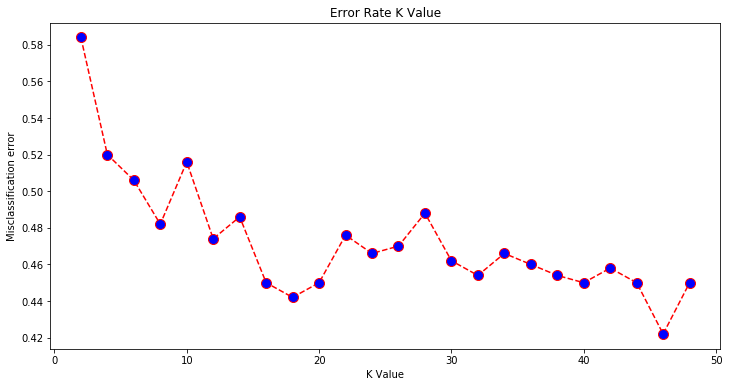

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(range(2, 50, 2), error_knn, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Misclassification error')

### Best accuracy (about 58%) for KNN received at K=46

# STEP 4
Print the classification metric report (2.5 points)

In [20]:
y_train[0:50]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0, 1, 3, 1, 1, 0, 0, 8, 4, 6, 5,
       7, 9, 1, 0, 3, 0, 7, 2, 1, 1, 0, 2, 9, 0, 2, 5, 1, 3, 2, 7, 9, 8,
       4, 9, 4, 5, 9, 3], dtype=uint8)

In [33]:
"""Run the KNN for the identified K"""
knn = KNeighborsClassifier(n_neighbors=46)
knn.fit(X_train, y_train)
print("Done with fit")

mini_batch_size = 600
mini_batches_X = [X_val[k:k+mini_batch_size] for k in range(0, X_val.shape[0], mini_batch_size)]
mini_batches_y = [y_val[k:k+mini_batch_size] for k in range(0, y_val.shape[0], mini_batch_size)]

print("Total number of iterations to be done: ", len(mini_batches))
print("\n")

y_val_pred = []
error_val_batches_knn = []

for batch_index in range(len(mini_batches)):
    print("***ITERATION: ", batch_index)
    X_val_sample = mini_batches_X[batch_index]
    y_val_sample = mini_batches_y[batch_index]
    
    # Predict
    pred_i = knn.predict(X_val_sample)
    y_val_pred = np.append(y_val_pred, pred_i)
    
    iter_acc=accuracy_score(y_val_sample,pred_i)
    misClaErr = 1 - iter_acc
    error_val_batches_knn.append(misClaErr)
    print("\tMisclassification error for this iteration is ", misClaErr)
    print("\tMean misclassification error for records predicted till this point: ", np.mean(error_val_batches_knn))
    print("\tPredicted values after this iteration: ", len(y_val_pred))

Done with fit
Total number of iterations to be done:  100


***ITERATION:  0
	Misclassification error for this iteration is  0.265
	Mean misclassification error for records predicted till this point:  0.265
	Predicted values after this iteration:  600
***ITERATION:  1
	Misclassification error for this iteration is  0.30166666666666664
	Mean misclassification error for records predicted till this point:  0.2833333333333333
	Predicted values after this iteration:  1200
***ITERATION:  2
	Misclassification error for this iteration is  0.32666666666666666
	Mean misclassification error for records predicted till this point:  0.29777777777777775
	Predicted values after this iteration:  1800
***ITERATION:  3
	Misclassification error for this iteration is  0.30000000000000004
	Mean misclassification error for records predicted till this point:  0.29833333333333334
	Predicted values after this iteration:  2400
***ITERATION:  4
	Misclassification error for this iteration is  0.28500000000000003
	

	Misclassification error for this iteration is  0.6066666666666667
	Mean misclassification error for records predicted till this point:  0.41209401709401705
	Predicted values after this iteration:  23400
***ITERATION:  39
	Misclassification error for this iteration is  0.5700000000000001
	Mean misclassification error for records predicted till this point:  0.41604166666666664
	Predicted values after this iteration:  24000
***ITERATION:  40
	Misclassification error for this iteration is  0.5933333333333333
	Mean misclassification error for records predicted till this point:  0.42036585365853657
	Predicted values after this iteration:  24600
***ITERATION:  41
	Misclassification error for this iteration is  0.5933333333333333
	Mean misclassification error for records predicted till this point:  0.42448412698412696
	Predicted values after this iteration:  25200
***ITERATION:  42
	Misclassification error for this iteration is  0.5816666666666667
	Mean misclassification error for records pre

	Misclassification error for this iteration is  0.375
	Mean misclassification error for records predicted till this point:  0.430952380952381
	Predicted values after this iteration:  46200
***ITERATION:  77
	Misclassification error for this iteration is  0.43500000000000005
	Mean misclassification error for records predicted till this point:  0.43100427350427356
	Predicted values after this iteration:  46800
***ITERATION:  78
	Misclassification error for this iteration is  0.4766666666666667
	Mean misclassification error for records predicted till this point:  0.4315822784810127
	Predicted values after this iteration:  47400
***ITERATION:  79
	Misclassification error for this iteration is  0.41666666666666663
	Mean misclassification error for records predicted till this point:  0.43139583333333337
	Predicted values after this iteration:  48000
***ITERATION:  80
	Misclassification error for this iteration is  0.2366666666666667
	Mean misclassification error for records predicted till th

In [35]:
acc_val_knn = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation data set is ", acc_val_knn)
misClaErr_val_knn = 1 - acc_val_knn
print("Misclassification error for validation data set is ", misClaErr_val_knn)

Accuracy on validation data set is  0.5733333333333334
Misclassification error for validation data set is  0.42666666666666664


Text(0, 0.5, 'Misclassification error')

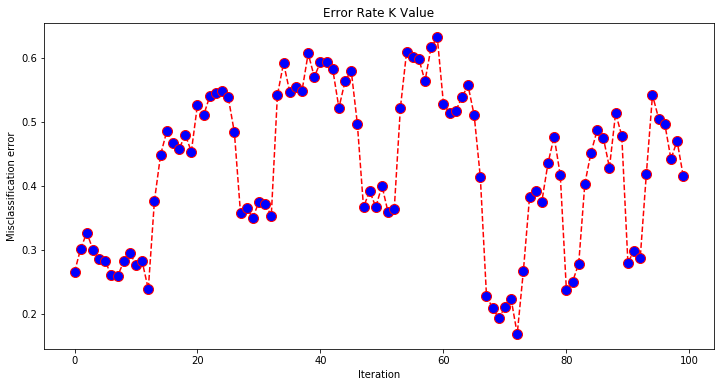

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, 100, 1), error_val_batches_knn, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('Iteration')
plt.ylabel('Misclassification error')

- Accuracy on validation data set is  0.5733333333333334
- Misclassification error for validation data set is  0.42666666666666664

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)

[[4414  210   90  108  151  111  258  109  189  360]
 [ 331 4535  144  202  227   88  107  191   79   96]
 [ 314  690 3419  271  165  123  114  489  167  248]
 [ 332  882  305 2981  188  448  124  230  289  221]
 [ 339  804  126  165 4027   78  147   64   95  155]
 [ 523  582  136  672  195 2765  396  117  354  260]
 [ 976  413  100  210  433  314 2759   87  520  188]
 [ 309  654  321  227   95   85  127 3942   86  154]
 [ 814  437  174  310  312  359  604   99 2550  341]
 [ 960  501  175  219  196  251  152  209  329 3008]]


# STEP 5
Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

#### Feedforward neural network with ReLU

In [102]:
""" feedforward neural network """
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)*0.01  # operands could not be broadcast together with shapes (42000,10) (42000,1024) 
        # self.W = np.random.randn(out_size, in_size)*0.01  # shapes (42000,1024) and (10,1024) not aligned: 1024 (dim 1) != 10 (dim 0)
        self.b = np.zeros((1, out_size))
        # self.b = np.zeros((out_size, 1))
        self.params = [self.W, self.b]
    
    def forward(self, x):
        self.X = x
        output = np.dot(self.X, self.W) + self.b
        return rectified(output)
    
# rectified linear function
"""
ReLU:
Return 0, if value is less than 0, else return value.
"""
def rectified(x):
    print(x.shape)
    out = np.zeros(x.shape)
    print(out.shape)
    for i in range(0, out.shape[0]):
        for j in range(0, out.shape[1]):
            if x[i, j] > 0:
                out[i, j] = x[i, j]
    return out

In [103]:
lin = Linear(1024, 10)
m = lin.forward(X_train)

(42000, 10)
(42000, 10)


In [104]:
m.shape

(42000, 10)

In [105]:
m[0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.0393981 ,
        0.        , 0.        , 0.03439608, 0.05084044, 0.11331949],
       [0.02298131, 0.        , 0.00946889, 0.03769892, 0.16113388,
        0.        , 0.        , 0.01813756, 0.14041236, 0.07567289],
       [0.        , 0.        , 0.        , 0.04171818, 0.14593541,
        0.        , 0.        , 0.00588732, 0.12943746, 0.09392184],
       [0.        , 0.        , 0.        , 0.12238786, 0.24270538,
        0.        , 0.        , 0.02551613, 0.19323399, 0.18078864],
       [0.        , 0.        , 0.00176788, 0.23489652, 0.19541208,
        0.        , 0.        , 0.        , 0.16371649, 0.18789719],
       [0.        , 0.        , 0.03260441, 0.29011677, 0.26218802,
        0.        , 0.        , 0.05002999, 0.1099322 , 0.1235025 ],
       [0.03081626, 0.        , 0.04166429, 0.10432601, 0.24329282,
        0.        , 0.        , 0.        , 0.07081777, 0.00963145],
       [0.        , 0.        , 0.       

#### 1 pass neural network

In [8]:
from tensorflow import keras
from tensorflow.keras import models, backend
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Dropout

In [9]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000,)
(18000,)
(60000,)
(42000, 10)
(18000, 10)
(60000, 10)


In [10]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(type(X_val[0][0]))

print(X_val[0].shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
<class 'numpy.float32'>
(1024,)


In [13]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS_ITER = 2
EPOCHS = 5

In [14]:
#Clear out tensorflow memory
backend.clear_session()


"""
INITIALIZE MODEL:
-----------------
"""
# Define the Type of Model
model1 = Sequential()


"""
RESHAPE DATA:
-------------
"""
# Input Layer: Flatten Imgaes to Vector
# model1.add(Reshape((1024,), input_shape=(28, 28, 1))) // Reshape not required as input is already in (1024,) shape
model1.add(Reshape((1024,)))


""" Hidden layers """
# Hidden Layer 1
model1.add(Dense(200, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model1.add(Dropout(0.25))

# Hidden Layer 1
model1.add(Dense(100, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model1.add(Dropout(0.25))

""" Output Layer """
model1.add(Dense(units=10, kernel_initializer='he_normal', use_bias=True, activation="softmax"))

# Loss and Optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.02)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
for val in range(0, EPOCHS_ITER, 1):
    print("\n\nEntering iteration ", val)
    model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=X_train.shape[0],
               validation_data=(X_test, y_test), 
               callbacks=callback_list, 
               verbose=True
              )

#



Entering iteration  0
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 4s 84us/sample - loss: 2.9015 - accuracy: 0.1013 - val_loss: 2.3963 - val_accuracy: 0.1000
Epoch 2/5
42000/42000 [==============================] - 1s 13us/sample - loss: 2.5892 - accuracy: 0.0978 - val_loss: 2.4066 - val_accuracy: 0.0994
Epoch 3/5
42000/42000 [==============================] - 1s 16us/sample - loss: 2.5693 - accuracy: 0.0985 - val_loss: 2.3641 - val_accuracy: 0.0973
Epoch 4/5
42000/42000 [==============================] - 1s 14us/sample - loss: 2.4889 - accuracy: 0.0990 - val_loss: 2.3225 - val_accuracy: 0.1121
Epoch 5/5
42000/42000 [==============================] - 1s 13us/sample - loss: 2.4141 - accuracy: 0.1016 - val_loss: 2.3086 - val_accuracy: 0.1074


Entering iteration  1
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 25us/sample - loss: 2.3805 - accuracy: 0.0988 - val_

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  205000    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  1010      
Total params: 226,110
Trainable params: 226,110
Non-trainable params: 0
__________________________________________________

# STEP 6
Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [16]:
#Clear out tensorflow memory
backend.clear_session()


"""
INITIALIZE MODEL:
-----------------
"""
# Define the Type of Model
model2 = Sequential()


"""
RESHAPE DATA:
-------------
"""
# Input Layer: Flatten Imgaes to Vector
# model2.add(Reshape((1024,), input_shape=(28, 28, 1))) // Reshape not required as input is already in (1024,) shape
model2.add(Reshape((1024,)))


""" Hidden layers """
# Hidden Layer 1
model2.add(Dense(200, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model2.add(Dropout(0.25))

# Hidden Layer 1
model2.add(Dense(100, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model2.add(Dropout(0.25))

""" Output Layer """
model2.add(Dense(units=10, kernel_initializer='he_normal', use_bias=True, activation="softmax"))

# Loss and Optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.02)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
for val in range(0, EPOCHS_ITER, 1):
    print("\n\nEntering iteration ", val)
    model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
               validation_data=(X_test, y_test), 
               callbacks=callback_list, 
               verbose=True
              )

#



Entering iteration  0
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 20s 476us/sample - loss: 2.2908 - accuracy: 0.1072 - val_loss: 2.2471 - val_accuracy: 0.1306
Epoch 2/5
42000/42000 [==============================] - 17s 416us/sample - loss: 2.2622 - accuracy: 0.1198 - val_loss: 2.2354 - val_accuracy: 0.1358
Epoch 3/5
42000/42000 [==============================] - 18s 425us/sample - loss: 2.2571 - accuracy: 0.1214 - val_loss: 2.2514 - val_accuracy: 0.1191
Epoch 4/5
42000/42000 [==============================] - 19s 452us/sample - loss: 2.2556 - accuracy: 0.1222 - val_loss: 2.2440 - val_accuracy: 0.1272
Epoch 5/5
42000/42000 [==============================] - 18s 424us/sample - loss: 2.2521 - accuracy: 0.1214 - val_loss: 2.2312 - val_accuracy: 0.1383


Entering iteration  1
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 18s 433us/sample - loss: 2.2504 - accuracy: 0

# STEP 7
Implement batch normalization for training the neural network (2.5 points)

In [17]:
#Clear out tensorflow memory
backend.clear_session()


"""
INITIALIZE MODEL:
-----------------
"""
# Define the Type of Model
model3 = Sequential()


"""
RESHAPE DATA:
-------------
"""
# Input Layer: Flatten Imgaes to Vector
# model3.add(Reshape((1024,), input_shape=(28, 28, 1))) // Reshape not required as input is already in (1024,) shape
model3.add(Reshape((1024,)))


""" Hidden layers """
# Hidden Layer 1
model3.add(keras.layers.BatchNormalization())
model3.add(Dense(200, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model3.add(Dropout(0.25))

# Hidden Layer 1
model3.add(keras.layers.BatchNormalization())
model3.add(Dense(100, kernel_initializer="he_normal", use_bias=True, activation='relu'))

# Dropout
model3.add(Dropout(0.25))

""" Output Layer """
model3.add(Dense(units=10, kernel_initializer='he_normal', use_bias=True, activation="softmax"))

# Loss and Optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.02)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
for val in range(0, EPOCHS_ITER, 1):
    print("\n\nEntering iteration ", val)
    model3.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
               validation_data=(X_test, y_test), 
               callbacks=callback_list, 
               verbose=True
              )

#



Entering iteration  0
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 28s 673us/sample - loss: 1.7919 - accuracy: 0.3939 - val_loss: 1.1140 - val_accuracy: 0.6699
Epoch 2/5
42000/42000 [==============================] - 25s 586us/sample - loss: 1.2650 - accuracy: 0.5902 - val_loss: 0.9265 - val_accuracy: 0.7278
Epoch 3/5
42000/42000 [==============================] - 25s 584us/sample - loss: 1.1252 - accuracy: 0.6395 - val_loss: 0.8516 - val_accuracy: 0.7516
Epoch 4/5
42000/42000 [==============================] - 24s 582us/sample - loss: 1.0411 - accuracy: 0.6670 - val_loss: 0.7615 - val_accuracy: 0.7774
Epoch 5/5
42000/42000 [==============================] - 24s 582us/sample - loss: 0.9933 - accuracy: 0.6844 - val_loss: 0.7283 - val_accuracy: 0.7882


Entering iteration  1
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 25s 601us/sample - loss: 0.9494 - accuracy: 0

# STEP 8
Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [20]:
from sklearn.metrics import confusion_matrix

y_val_pred_model3 = model3.predict(X_val)

In [40]:
# a = np.arange(6).reshape(2,3) #+ 10
# print(a)
# print("\n", np.argmax(a))
# print(np.argmax(a, axis=0))
# print(np.argmax(a, axis=1))

In [37]:
# Use np.argmax to find the index of the max value in the row
confusion_matrix = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_val_pred_model3, axis=1))
print(confusion_matrix)

[[5228  194   30   70  103   35   70   93   30  147]
 [  89 5263   49   76  186   21   32  217   24   43]
 [  45  176 4953  100  145   48   27  318   46  142]
 [  75  227   95 4576  112  479   50  155  109  122]
 [  79  217   74   34 5252   46   58   50   39  151]
 [  52  121   45  271   94 5018  181   47   71  100]
 [ 201  133   27   72  201  293 4771   55  171   76]
 [  51  272  110   53   53   33   21 5314   10   83]
 [ 159  196   89  186  192  242  276   68 4355  237]
 [ 169  186   64  128  127  188   37  116   86 4899]]


### KNN
- Extremely slow
- Highly expensive in terms of time and resource requirement
    - Due to high resource requirement, could do testing only on a part of the test set
    - Had to break the validation dataset into smaller batches for predicting one by one
- Accuracy of between 50 and 60 % was achieved

### Feedforward neural network
- Learning was done only after processing the complete train set
- Was quick
- Learning was low
- Accuracy is very low, of below 10 %

### Backward propagation without batch normalization
- Smaller batches were used, so that learning can be done multiple times in the same batch
- Was slower in completing the same number of epochs, compared to feedforward
- Learning was low
- Accuracy is very low, of about 15 %
- The learning probably suffered from exploding gradient

### Backward propagation with batch normalization
- Batch normalization was used after input and hidden layers
- Has similar speed as the backpropagation without batch normalization
- Learning was comparitively high
- Accuracy of over 80 % was acheived in the same number of epochs as for the other neural networks
- The improvement was probably acheived by avoiding exploding gradient problem, by the use of batch normalization